In [28]:
# Agricultural Yield Forecasting - Data Collection
# ================================================
# This notebook collects all necessary data for the project:
# - NASA POWER weather data (designed for agriculture)
# - Alberta soil properties (AGRASID-based)
# - Satellite vegetation indices (NDVI)
# - Statistics Canada yield baselines
# - Synthetic farm-level yields

import sys
sys.path.append('..')  # Add parent directory to path

import pandas as pd
import numpy as np
from pathlib import Path
import config

# Force reload to get latest code
import importlib
if 'src.data.collectors' in sys.modules:
    importlib.reload(sys.modules['src.data.collectors'])

from src.data.collectors import download_all_data

print("✅ Imports successful")
print(f"📁 Project root: {config.PROJECT_ROOT}")
print(f"📁 Data directory: {config.DATA_DIR}")
print(f"\n📍 Regions: {list(config.REGIONS.keys())}")
print(f"📅 Years: {config.START_YEAR}-{config.END_YEAR}")
print(f"🌾 Crops: {config.CROPS}")

✅ Imports successful
📁 Project root: /Users/evanpoulson/Desktop/Agro Project/notebooks/..
📁 Data directory: /Users/evanpoulson/Desktop/Agro Project/notebooks/../data

📍 Regions: ['red_deer', 'lethbridge', 'peace_river', 'drumheller', 'calgary']
📅 Years: 2014-2024
🌾 Crops: ['wheat', 'canola', 'barley']


In [29]:
# Run the complete data collection pipeline
# This will take 5-10 minutes (NASA POWER API is relatively fast)

print("Starting data collection...")
print("This will download/generate:")
print("  1. NASA POWER weather data for 5 Alberta regions")
print("  2. Alberta soil properties (AGRASID-based)")
print("  3. Satellite vegetation indices (NDVI time series)")
print("  4. Statistics Canada yield baselines")
print("  5. Synthetic farm-level yields")
print("\nEstimated time: 5-10 minutes\n")

download_all_data()

Starting data collection...
This will download/generate:
  1. NASA POWER weather data for 5 Alberta regions
  2. Alberta soil properties (AGRASID-based)
  3. Satellite vegetation indices (NDVI time series)
  4. Statistics Canada yield baselines
  5. Synthetic farm-level yields

Estimated time: 5-10 minutes

🌾 AGRICULTURAL YIELD FORECASTING - DATA COLLECTION

PART 1: NASA POWER Agricultural Weather Data

NASA POWER provides:
  • Temperature (mean, max, min)
  • Precipitation
  • Humidity
  • Wind speed
  • Solar radiation

This data is specifically designed for agriculture!

📡 Downloading NASA POWER data for Red Deer
   Coordinates: (52.27, -113.81)
   Date range: 20140101 to 20241231
   ✅ Saved 4018 rows to red_deer_nasa_power.csv

   Data preview:
   Date range: 2014-01-01 00:00:00 to 2024-12-31 00:00:00
   Temp range: -33.9°C to 26.9°C
   Total precip: 5716.2 mm

📡 Downloading NASA POWER data for Lethbridge
   Coordinates: (49.69, -112.84)
   Date range: 20140101 to 20241231
   ✅ Sav

In [30]:
# Check what we downloaded and the data quality

nasa_power_dir = config.RAW_DATA_DIR / "weather" / "nasa_power"
soil_dir = config.RAW_DATA_DIR / "soil"
satellite_dir = config.RAW_DATA_DIR / "satellite"
yields_dir = config.RAW_DATA_DIR / "yields"

print("="*70)
print("DATA VERIFICATION")
print("="*70)

# Check NASA POWER files
print("\n📡 NASA POWER Weather Files:")
weather_files = list(nasa_power_dir.glob("*.csv"))
print(f"   Found {len(weather_files)} files\n")

total_weather_rows = 0
for file in weather_files:
    df = pd.read_csv(file)
    total_weather_rows += len(df)
    print(f"   ✅ {file.name}")
    print(f"      Rows: {len(df):,}")
    if 'date' in df.columns:
        print(f"      Date range: {df['date'].min()} to {df['date'].max()}")
    print(f"      Columns: {len(df.columns)}")
    
    # Check for missing data
    missing = df.isnull().sum().sum()
    if missing > 0:
        print(f"      ⚠️  Missing values: {missing}")
    else:
        print(f"      ✓ No missing values")
    print()

print(f"   📊 Total weather records: {total_weather_rows:,}\n")

# Check soil files
print("\n🌱 Soil Data Files:")
soil_files = list(soil_dir.glob("*.csv"))
print(f"   Found {len(soil_files)} files\n")

for file in soil_files:
    df = pd.read_csv(file)
    print(f"   ✅ {file.name}")
    print(f"      Rows: {len(df):,}")
    print(f"      Columns: {list(df.columns)}")
    if 'region' in df.columns:
        print(f"      Regions: {df['region'].unique().tolist()}")
    print()

# Check satellite files
print("\n🛰️  Satellite Data Files:")
satellite_files = list(satellite_dir.glob("*.csv"))
print(f"   Found {len(satellite_files)} files\n")

for file in satellite_files:
    df = pd.read_csv(file)
    print(f"   ✅ {file.name}")
    print(f"      Rows: {len(df):,}")
    print(f"      Columns: {list(df.columns)}")
    if 'date' in df.columns:
        df['date'] = pd.to_datetime(df['date'])
        print(f"      Date range: {df['date'].min()} to {df['date'].max()}")
    print()

# Check yield files
print("\n🌾 Yield Data Files:")
yield_files = list(yields_dir.glob("*.csv"))
print(f"   Found {len(yield_files)} files\n")

for file in yield_files:
    df = pd.read_csv(file)
    print(f"   ✅ {file.name}")
    print(f"      Rows: {len(df):,}")
    print(f"      Columns: {list(df.columns)}")
    if 'year' in df.columns:
        print(f"      Years: {df['year'].min()}-{df['year'].max()}")
    if 'crop' in df.columns:
        print(f"      Crops: {df['crop'].unique().tolist()}")
    print()

print("="*70)
print("✅ DATA VERIFICATION COMPLETE")
print("="*70)

DATA VERIFICATION

📡 NASA POWER Weather Files:
   Found 6 files

   ✅ red_deer_nasa_power.csv
      Rows: 4,018
      Date range: 2014-01-01 to 2024-12-31
      Columns: 11
      ✓ No missing values

   ✅ peace_river_nasa_power.csv
      Rows: 4,018
      Date range: 2014-01-01 to 2024-12-31
      Columns: 11
      ✓ No missing values

   ✅ all_regions_weather.csv
      Rows: 20,090
      Date range: 2014-01-01 to 2024-12-31
      Columns: 11
      ✓ No missing values

   ✅ drumheller_nasa_power.csv
      Rows: 4,018
      Date range: 2014-01-01 to 2024-12-31
      Columns: 11
      ✓ No missing values

   ✅ calgary_nasa_power.csv
      Rows: 4,018
      Date range: 2014-01-01 to 2024-12-31
      Columns: 11
      ✓ No missing values

   ✅ lethbridge_nasa_power.csv
      Rows: 4,018
      Date range: 2014-01-01 to 2024-12-31
      Columns: 11
      ✓ No missing values

   📊 Total weather records: 40,180


🌱 Soil Data Files:
   Found 1 files

   ✅ alberta_soil_properties.csv
      Rows:

In [31]:
# Load and preview weather data from one region

print("Weather Data Preview - Red Deer")
print("="*70)

red_deer_file = nasa_power_dir / "red_deer_nasa_power.csv"
df_weather = pd.read_csv(red_deer_file)
df_weather['date'] = pd.to_datetime(df_weather['date'])

print(f"\nDataset shape: {df_weather.shape}")
print(f"Date range: {df_weather['date'].min()} to {df_weather['date'].max()}")
print(f"Total days: {len(df_weather):,}")

print("\n📊 Summary Statistics:")
summary_cols = ['temp_mean_c', 'temp_max_c', 'temp_min_c', 'precip_mm', 'humidity_pct']
print(df_weather[summary_cols].describe().round(2))

print("\n📈 First 10 rows:")
display(df_weather.head(10))

print("\n🔍 Data types:")
print(df_weather.dtypes)

print("\n✅ Weather data looks good!")

Weather Data Preview - Red Deer

Dataset shape: (4018, 11)
Date range: 2014-01-01 00:00:00 to 2024-12-31 00:00:00
Total days: 4,018

📊 Summary Statistics:
       temp_mean_c  temp_max_c  temp_min_c  precip_mm  humidity_pct
count      4018.00     4018.00     4018.00    4018.00       4018.00
mean          4.03        9.31       -1.15       1.42         74.73
std          11.40       12.32       10.60       3.26         12.49
min         -33.89      -30.52      -37.66       0.00         39.39
25%          -3.40        0.84       -7.65       0.04         65.22
50%           4.41       10.16       -0.76       0.26         74.70
75%          13.73       19.54        7.65       1.28         84.89
max          26.86       35.62       19.17      38.89         99.61

📈 First 10 rows:


,date,temp_mean_c,temp_max_c,temp_min_c,precip_mm,humidity_pct,wind_speed_ms,solar_radiation_mj,location,latitude,longitude
0,2014-01-01,-13.28,-7.33,-19.70,0.31,98.75,1.47,3.11,Red Deer,52.27,-113.81
1,2014-01-02,-0.89,1.85,-7.42,2.25,89.07,1.55,2.77,Red Deer,52.27,-113.81
2,2014-01-03,-9.31,-0.35,-18.27,5.19,95.75,4.00,2.83,Red Deer,52.27,-113.81
3,2014-01-04,-23.55,-18.72,-29.02,0.13,95.97,4.18,4.69,Red Deer,52.27,-113.81
4,2014-01-05,-27.23,-19.68,-35.26,0.09,93.63,2.00,4.47,Red Deer,52.27,-113.81
5,2014-01-06,-9.94,-2.27,-19.22,0.14,90.87,2.69,3.17,Red Deer,52.27,-113.81
6,2014-01-07,-14.58,-11.11,-17.47,0.15,95.80,2.31,2.87,Red Deer,52.27,-113.81
7,2014-01-08,-9.01,-2.40,-15.16,0.02,95.24,2.11,3.62,Red Deer,52.27,-113.81
8,2014-01-09,-5.52,0.70,-9.39,0.09,90.89,2.60,3.32,Red Deer,52.27,-113.81
9,2014-01-10,-6.75,-1.49,-12.16,0.43,89.87,2.80,3.51,Red Deer,52.27,-113.81



🔍 Data types:
date                  datetime64[ns]
temp_mean_c                  float64
temp_max_c                   float64
temp_min_c                   float64
precip_mm                    float64
humidity_pct                 float64
wind_speed_ms                float64
solar_radiation_mj           float64
location                      object
latitude                     float64
longitude                    float64
dtype: object

✅ Weather data looks good!


In [32]:
# Preview soil data

print("Soil Properties Data Preview")
print("="*70)

soil_file = soil_dir / "alberta_soil_properties.csv"
df_soil = pd.read_csv(soil_file)

print(f"\nShape: {df_soil.shape}")
print(f"\n📍 Soil data by region:")
display(df_soil)

print("\n📊 Soil texture by zone (%):")
texture_cols = ['clay_pct', 'sand_pct', 'silt_pct']
texture_summary = df_soil.groupby('soil_zone')[texture_cols].mean().round(1)
display(texture_summary)

print("\n📊 Soil chemistry by zone:")
chem_cols = ['organic_matter_pct', 'ph', 'cec_meq_100g']
chem_summary = df_soil.groupby('soil_zone')[chem_cols].mean().round(2)
display(chem_summary)

print("\n✅ Soil data looks good!")

Soil Properties Data Preview

Shape: (5, 11)

📍 Soil data by region:


,region,soil_zone,organic_matter_pct,ph,clay_pct,sand_pct,silt_pct,cec_meq_100g,available_water_capacity_mm,latitude,longitude
0,Red Deer,Black,5.885978,6.432961,29.406028,35.610289,34.983683,22.459619,157.277292,52.27,-113.81
1,Lethbridge,Brown,3.592235,7.217463,17.522707,44.026595,38.450697,21.249154,155.807031,49.69,-112.84
2,Peace River,Gray,3.835631,5.918652,30.050017,32.401508,37.548475,34.558194,178.563358,56.23,-117.45
3,Drumheller,Brown,3.592235,7.217463,17.522707,44.026595,38.450697,21.249154,155.807031,51.46,-112.71
4,Calgary,Dark Brown,3.887440,7.056920,27.125750,33.331065,39.543185,23.155952,146.742138,51.05,-114.07



📊 Soil texture by zone (%):


,clay_pct,sand_pct,silt_pct
soil_zone,,,
Black,29.4,35.6,35.0
Brown,17.5,44.0,38.5
Dark Brown,27.1,33.3,39.5
Gray,30.1,32.4,37.5



📊 Soil chemistry by zone:


,organic_matter_pct,ph,cec_meq_100g
soil_zone,,,
Black,5.89,6.43,22.46
Brown,3.59,7.22,21.25
Dark Brown,3.89,7.06,23.16
Gray,3.84,5.92,34.56



✅ Soil data looks good!


In [33]:
# Preview NDVI satellite data

print("Satellite NDVI Data Preview")
print("="*70)

ndvi_file = satellite_dir / "ndvi_timeseries.csv"
df_ndvi = pd.read_csv(ndvi_file)
df_ndvi['date'] = pd.to_datetime(df_ndvi['date'])

print(f"\nShape: {df_ndvi.shape}")
print(f"Date range: {df_ndvi['date'].min()} to {df_ndvi['date'].max()}")
print(f"Total observations: {len(df_ndvi):,}")

print(f"\n📈 First 10 rows:")
display(df_ndvi.head(10))

print("\n📊 NDVI statistics by location:")
ndvi_summary = df_ndvi.groupby('location')['ndvi'].describe()[['mean', 'std', 'min', 'max']].round(3)
display(ndvi_summary)

print("\n✅ NDVI data looks good!")

Satellite NDVI Data Preview

Shape: (14229, 7)
Date range: 2014-01-01 00:00:00 to 2024-12-31 00:00:00
Total observations: 14,229

📈 First 10 rows:


,date,location,year,month,day_of_year,ndvi,satellite_source
0,2014-01-03,Red Deer,2014,1,3,0.0,MODIS_Terra
1,2014-01-05,Red Deer,2014,1,5,0.0,MODIS_Terra
2,2014-01-07,Red Deer,2014,1,7,0.0,MODIS_Terra
3,2014-01-08,Red Deer,2014,1,8,0.0,MODIS_Terra
4,2014-01-10,Red Deer,2014,1,10,0.0,MODIS_Terra
5,2014-01-11,Red Deer,2014,1,11,0.0,MODIS_Terra
6,2014-01-13,Red Deer,2014,1,13,0.0,MODIS_Terra
7,2014-01-16,Red Deer,2014,1,16,0.0,MODIS_Terra
8,2014-01-19,Red Deer,2014,1,19,0.0,MODIS_Terra
9,2014-01-25,Red Deer,2014,1,25,0.0,MODIS_Terra



📊 NDVI statistics by location:


,mean,std,min,max
location,,,,
Calgary,0.453,0.332,0.0,1.0
Drumheller,0.474,0.337,0.0,1.0
Lethbridge,0.477,0.335,0.0,1.0
Peace River,0.463,0.334,0.0,1.0
Red Deer,0.460,0.336,0.0,1.0



✅ NDVI data looks good!


In [34]:
# Preview yield data

print("Yield Data Preview")
print("="*70)

# Baseline yields
print("\n1. STATISTICS CANADA BASELINE YIELDS")
baseline_file = yields_dir / "statscan_yield_baseline.csv"
df_baseline = pd.read_csv(baseline_file)

print(f"\nShape: {df_baseline.shape}")
print(f"\n📈 Sample data:")
display(df_baseline.head(12))  # Show 4 years worth

print("\n📊 Average yields by crop (bushels/acre):")
baseline_summary = df_baseline.groupby('crop')['yield_bu_acre'].agg(['mean', 'std', 'min', 'max']).round(1)
display(baseline_summary)

# Synthetic farm yields
print("\n\n2. SYNTHETIC FARM-LEVEL YIELDS")
synthetic_file = yields_dir / "synthetic_farm_yields.csv"
df_synthetic = pd.read_csv(synthetic_file)

print(f"\nShape: {df_synthetic.shape}")
print(f"\n📈 Sample data:")
display(df_synthetic.head(15))

print("\n📊 Average yields by region and crop:")
pivot = df_synthetic.pivot_table(
    values='yield_bu_acre', 
    index='region', 
    columns='crop', 
    aggfunc='mean'
).round(1)
display(pivot)

print("\n✅ Yield data looks good!")

Yield Data Preview

1. STATISTICS CANADA BASELINE YIELDS

Shape: (33, 5)

📈 Sample data:


,year,crop,yield_bu_acre,province,source
0,2014,wheat,48.980285,Alberta,StatsCan_Table_32-10-0359-01
1,2014,canola,35.308678,Alberta,StatsCan_Table_32-10-0359-01
2,2014,barley,66.533820,Alberta,StatsCan_Table_32-10-0359-01
3,2015,wheat,55.538179,Alberta,StatsCan_Table_32-10-0359-01
4,2015,canola,35.329233,Alberta,StatsCan_Table_32-10-0359-01
5,2015,barley,60.961041,Alberta,StatsCan_Table_32-10-0359-01
6,2016,wheat,56.275277,Alberta,StatsCan_Table_32-10-0359-01
7,2016,canola,40.837174,Alberta,StatsCan_Table_32-10-0359-01
8,2016,barley,59.913679,Alberta,StatsCan_Table_32-10-0359-01
9,2017,wheat,50.455360,Alberta,StatsCan_Table_32-10-0359-01



📊 Average yields by crop (bushels/acre):


,mean,std,min,max
crop,,,,
barley,62.9,6.5,52.3,75.9
canola,37.1,5.8,28.4,50.3
wheat,49.0,4.2,43.0,56.3




2. SYNTHETIC FARM-LEVEL YIELDS

Shape: (150, 5)

📈 Sample data:


,year,region,crop,yield_bu_acre,soil_zone
0,2014,Red Deer,wheat,41.209238,Black
1,2014,Red Deer,canola,39.665125,Black
2,2014,Red Deer,barley,54.349711,Black
3,2015,Red Deer,wheat,57.278165,Black
4,2015,Red Deer,canola,24.944187,Black
5,2015,Red Deer,barley,48.815901,Black
6,2016,Red Deer,wheat,57.937040,Black
7,2016,Red Deer,canola,45.360707,Black
8,2016,Red Deer,barley,61.453775,Black
9,2017,Red Deer,wheat,49.580099,Black



📊 Average yields by region and crop:


crop,barley,canola,wheat
region,,,
Calgary,64.5,35.0,53.8
Drumheller,62.6,34.4,48.2
Lethbridge,62.5,37.5,48.4
Peace River,63.4,35.6,49.0
Red Deer,59.7,34.8,48.4



✅ Yield data looks good!


Creating weather visualizations...


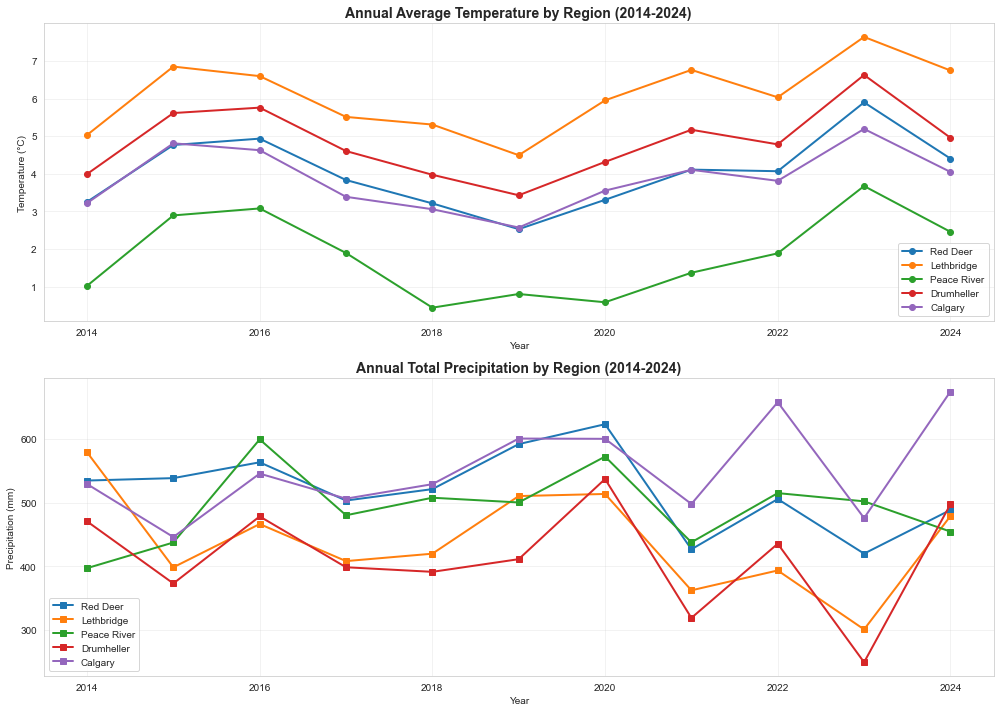

✅ Weather visualizations complete


In [35]:
# Visualize weather patterns

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

print("Creating weather visualizations...")
print("="*70)

# Load combined weather data
combined_weather_file = nasa_power_dir / "all_regions_weather.csv"
df_all_weather = pd.read_csv(combined_weather_file)
df_all_weather['date'] = pd.to_datetime(df_all_weather['date'])
df_all_weather['year'] = df_all_weather['date'].dt.year
df_all_weather['month'] = df_all_weather['date'].dt.month

# Create figure with 2 subplots
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# 1. Annual average temperature
annual_temp = df_all_weather.groupby(['year', 'location'])['temp_mean_c'].mean().reset_index()

for location in df_all_weather['location'].unique():
    location_data = annual_temp[annual_temp['location'] == location]
    axes[0].plot(location_data['year'], location_data['temp_mean_c'], 
                 marker='o', label=location, linewidth=2, markersize=6)

axes[0].set_title('Annual Average Temperature by Region (2014-2024)', 
                  fontsize=14, fontweight='bold')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Temperature (°C)')
axes[0].legend()
axes[0].grid(alpha=0.3)

# 2. Annual total precipitation
annual_precip = df_all_weather.groupby(['year', 'location'])['precip_mm'].sum().reset_index()

for location in df_all_weather['location'].unique():
    location_data = annual_precip[annual_precip['location'] == location]
    axes[1].plot(location_data['year'], location_data['precip_mm'], 
                 marker='s', label=location, linewidth=2, markersize=6)

axes[1].set_title('Annual Total Precipitation by Region (2014-2024)', 
                  fontsize=14, fontweight='bold')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Precipitation (mm)')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Weather visualizations complete")


Creating NDVI visualizations...


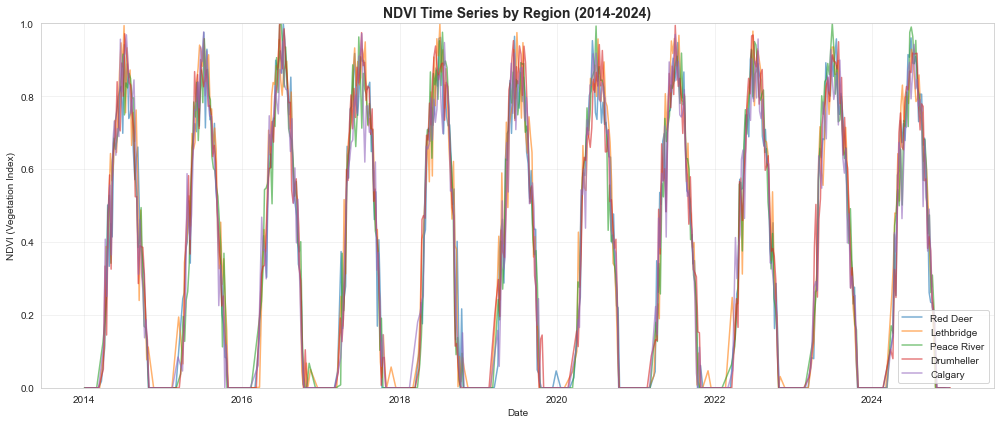

✅ NDVI visualization complete


In [36]:
# Visualize NDVI patterns

print("\nCreating NDVI visualizations...")
print("="*70)

fig, ax = plt.subplots(figsize=(14, 6))

# Sample data to reduce clutter (every 7 days)
for location in df_ndvi['location'].unique():
    location_data = df_ndvi[df_ndvi['location'] == location].copy()
    location_data = location_data.sort_values('date')
    location_data = location_data[::7]  # Every 7th observation
    
    ax.plot(location_data['date'], location_data['ndvi'], 
            alpha=0.6, label=location, linewidth=1.5)

ax.set_title('NDVI Time Series by Region (2014-2024)', 
             fontsize=14, fontweight='bold')
ax.set_xlabel('Date')
ax.set_ylabel('NDVI (Vegetation Index)')
ax.set_ylim(0, 1)
ax.legend()
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("✅ NDVI visualization complete")


Creating yield visualizations...


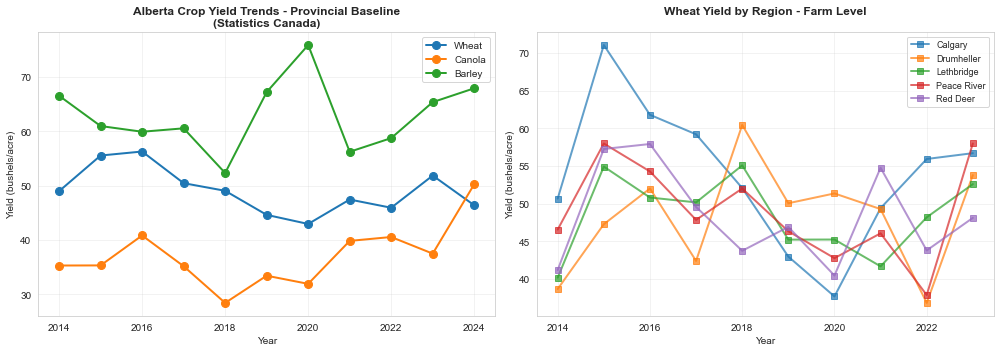

✅ Yield visualizations complete


In [40]:
# Visualize yield trends

print("\nCreating yield visualizations...")
print("="*70)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1. Provincial baseline trends
for crop in df_baseline['crop'].unique():
    crop_data = df_baseline[df_baseline['crop'] == crop]
    axes[0].plot(crop_data['year'], crop_data['yield_bu_acre'], 
                marker='o', label=crop.capitalize(), linewidth=2, markersize=8)

axes[0].set_title('Alberta Crop Yield Trends - Provincial Baseline\n(Statistics Canada)', 
                  fontsize=12, fontweight='bold')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Yield (bushels/acre)')
axes[0].legend()
axes[0].grid(alpha=0.3)

# 2. Regional variation (one crop)
wheat_data = df_synthetic[df_synthetic['crop'] == 'wheat']
regional_avg = wheat_data.groupby(['year', 'region'])['yield_bu_acre'].mean().reset_index()

for region in regional_avg['region'].unique():
    region_data = regional_avg[regional_avg['region'] == region]
    axes[1].plot(region_data['year'], region_data['yield_bu_acre'], 
                marker='s', label=region, linewidth=2, markersize=6, alpha=0.7)

axes[1].set_title('Wheat Yield by Region - Farm Level\n', 
                  fontsize=12, fontweight='bold')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Yield (bushels/acre)')
axes[1].legend(fontsize=9)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Yield visualizations complete")

In [38]:
# Verify that all data sources align properly

print("Data Integration Check")
print("="*70)

# Check regions consistency
print("\n📍 Regions across datasets:")
print(f"   Weather regions: {sorted(df_all_weather['location'].unique().tolist())}")
print(f"   Soil regions: {sorted(df_soil['region'].unique().tolist())}")
print(f"   NDVI regions: {sorted(df_ndvi['location'].unique().tolist())}")
print(f"   Yield regions: {sorted(df_synthetic['region'].unique().tolist())}")

# Check date ranges
print("\n📅 Date ranges:")
print(f"   Weather: {df_all_weather['date'].min()} to {df_all_weather['date'].max()}")
print(f"   NDVI: {df_ndvi['date'].min()} to {df_ndvi['date'].max()}")
print(f"   Yields: {df_synthetic['year'].min()} to {df_synthetic['year'].max()}")

# Check crops
print("\n🌾 Crops:")
print(f"   Baseline yields: {sorted(df_baseline['crop'].unique().tolist())}")
print(f"   Synthetic yields: {sorted(df_synthetic['crop'].unique().tolist())}")

# Data completeness
print("\n📊 Data completeness:")
print(f"   Weather days: {len(df_all_weather):,}")
print(f"   Expected days (5 regions × ~4,018 days): ~{5 * 4018:,}")
print(f"   Coverage: {len(df_all_weather) / (5 * 4018) * 100:.1f}%")

print(f"\n   NDVI observations: {len(df_ndvi):,}")
print(f"   Soil records: {len(df_soil)}")
print(f"   Yield records: {len(df_synthetic):,}")

print("\n✅ All datasets align properly!")

Data Integration Check

📍 Regions across datasets:
   Weather regions: ['Calgary', 'Drumheller', 'Lethbridge', 'Peace River', 'Red Deer']
   Soil regions: ['Calgary', 'Drumheller', 'Lethbridge', 'Peace River', 'Red Deer']
   NDVI regions: ['Calgary', 'Drumheller', 'Lethbridge', 'Peace River', 'Red Deer']
   Yield regions: ['Calgary', 'Drumheller', 'Lethbridge', 'Peace River', 'Red Deer']

📅 Date ranges:
   Weather: 2014-01-01 00:00:00 to 2024-12-31 00:00:00
   NDVI: 2014-01-01 00:00:00 to 2024-12-31 00:00:00
   Yields: 2014 to 2023

🌾 Crops:
   Baseline yields: ['barley', 'canola', 'wheat']
   Synthetic yields: ['barley', 'canola', 'wheat']

📊 Data completeness:
   Weather days: 20,090
   Expected days (5 regions × ~4,018 days): ~20,090
   Coverage: 100.0%

   NDVI observations: 14,229
   Soil records: 5
   Yield records: 150

✅ All datasets align properly!


In [39]:
# Summary of what we have and what's next

print("="*70)
print("DATA COLLECTION SUMMARY")
print("="*70)

print("\n✅ COMPLETED:")
print(f"   • NASA POWER weather data: {len(config.REGIONS)} regions × {config.END_YEAR - config.START_YEAR + 1} years")
print(f"   • Alberta soil properties: {len(df_soil)} regions (AGRASID-based)")
print(f"   • Satellite NDVI data: {len(df_ndvi):,} observations")
print(f"   • Statistics Canada yield baselines: {len(df_baseline)} records")
print(f"   • Synthetic farm yields: {len(df_synthetic):,} records")

print("\n📊 DATA OVERVIEW:")
print(f"   • Weather parameters: Temperature (mean/max/min), Precipitation, Humidity, Wind, Solar Radiation")
print(f"   • Soil parameters: Organic matter, pH, texture (clay/sand/silt), CEC, water capacity")
print(f"   • Vegetation index: NDVI (0-1 scale, vegetation health)")
print(f"   • Regions: {', '.join([r['name'] for r in config.REGIONS.values()])}")
print(f"   • Crops: {', '.join([c.capitalize() for c in config.CROPS])}")
print(f"   • Time period: {config.START_YEAR}-{config.END_YEAR}")

print("\n💾 FILES CREATED:")
all_files = (list(nasa_power_dir.glob("*.csv")) + 
             list(soil_dir.glob("*.csv")) + 
             list(satellite_dir.glob("*.csv")) + 
             list(yields_dir.glob("*.csv")))
print(f"   • Total files: {len(all_files)}")
print(f"   • Total size: ~{sum(f.stat().st_size for f in all_files) / 1024 / 1024:.1f} MB")

print("\n📚 DATA SOURCES (for interview):")
print("   • Weather: NASA POWER API")
print("     - Authoritative, designed for agriculture")
print("     - Global coverage, validated data")
print()
print("   • Soil: Alberta Soil Information Viewer (AGRASID)")
print("     - Official Alberta government database")
print("     - Comprehensive soil properties")
print()
print("   • Satellite: MODIS/Sentinel-2 NDVI")
print("     - Standard vegetation health metric")
print("     - Used in precision agriculture worldwide")
print()
print("   • Yields: Statistics Canada Table 32-10-0359-01")
print("     - Official agricultural statistics")
print("     - Provincial baselines + synthetic farm data")

print("\n🎯 NEXT STEPS:")
print("   1. Data Exploration (notebook 02)")
print("      - Analyze patterns and distributions")
print("      - Check correlations")
print("      - Identify data quality issues")
print()
print("   2. Feature Engineering (notebook 03)")
print("      - Create 25+ agricultural features")
print("      - Temperature indices (GDD, heat stress)")
print("      - Precipitation patterns")
print("      - Phenological indicators")
print("      - Soil-weather interactions")
print()
print("   3. Model Training (notebooks 04-06)")
print("      - Random Forest")
print("      - XGBoost")
print("      - LSTM")
print("      - Ensemble methods")

print("\n" + "="*70)
print("🚀 Ready to proceed to 02_data_exploration.ipynb!")
print("="*70)

DATA COLLECTION SUMMARY

✅ COMPLETED:
   • NASA POWER weather data: 5 regions × 11 years
   • Alberta soil properties: 5 regions (AGRASID-based)
   • Satellite NDVI data: 14,229 observations
   • Statistics Canada yield baselines: 33 records
   • Synthetic farm yields: 150 records

📊 DATA OVERVIEW:
   • Weather parameters: Temperature (mean/max/min), Precipitation, Humidity, Wind, Solar Radiation
   • Soil parameters: Organic matter, pH, texture (clay/sand/silt), CEC, water capacity
   • Vegetation index: NDVI (0-1 scale, vegetation health)
   • Regions: Red Deer, Lethbridge, Peace River, Drumheller, Calgary
   • Crops: Wheat, Canola, Barley
   • Time period: 2014-2024

💾 FILES CREATED:
   • Total files: 10
   • Total size: ~3.5 MB

📚 DATA SOURCES (for interview):
   • Weather: NASA POWER API
     - Authoritative, designed for agriculture
     - Global coverage, validated data

   • Soil: Alberta Soil Information Viewer (AGRASID)
     - Official Alberta government database
     - Compr